# Climate Indices — Monthly Anomalies

This notebooks is used to test the monthly anomaly calculation of the dataset

In [55]:
import matplotlib.pyplot as plt
import climate_index_collection as cic
import numpy as np
import xarray as xr

### Use an example dataset to check the calculation of the monthly anomalies

In [56]:
data_path="../data/test_data/"
data_source_name="FOCI"

data_set = cic.data_loading.load_data_set(data_path=data_path, data_source_name=data_source_name)
display(data_set["sea-surface-temperature"])

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.DataArray 'sea-surface-temperature' (time: 120, lat: 96, lon: 192)>
dask.array<open_dataset-f66bba65cf802eb431c224655dfacfd3tsw, shape=(120, 96, 192), dtype=float32, chunksize=(120, 96, 192), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 88.57 86.72 84.86 83.0 ... -83.0 -84.86 -86.72 -88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) object 2350-02-28 23:52:00 ... 2360-01-31 23:52:00
Attributes:
    long_name:         surface temperature of water
    units:             K
    code:              103
    table:             128
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  48

In [65]:
weighted_ma = cic.reductions.monthly_mean_weighted(data_set)
unweighted_ma = cic.reductions.monthly_mean_weighted(data_set)

display(weighted_ma, unweighted_ma)

<xarray.Dataset>
Dimensions:                  (lat: 96, lon: 192, plev: 1, month: 12)
Coordinates:
  * lat                      (lat) float64 88.57 86.72 84.86 ... -86.72 -88.57
  * lon                      (lon) float64 0.0 1.875 3.75 ... 354.4 356.2 358.1
  * plev                     (plev) float64 5e+04
  * month                    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    geopotential-height      (month, plev, lat, lon) float64 dask.array<chunksize=(1, 1, 96, 192), meta=np.ndarray>
    sea-level-pressure       (month, lat, lon) float64 dask.array<chunksize=(1, 96, 192), meta=np.ndarray>
    sea-surface-temperature  (month, lat, lon) float64 dask.array<chunksize=(1, 96, 192), meta=np.ndarray>

<xarray.Dataset>
Dimensions:                  (lat: 96, lon: 192, plev: 1, month: 12)
Coordinates:
  * lat                      (lat) float64 88.57 86.72 84.86 ... -86.72 -88.57
  * lon                      (lon) float64 0.0 1.875 3.75 ... 354.4 356.2 358.1
  * plev                     (plev) float64 5e+04
  * month                    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    geopotential-height      (month, plev, lat, lon) float64 dask.array<chunksize=(1, 1, 96, 192), meta=np.ndarray>
    sea-level-pressure       (month, lat, lon) float64 dask.array<chunksize=(1, 96, 192), meta=np.ndarray>
    sea-surface-temperature  (month, lat, lon) float64 dask.array<chunksize=(1, 96, 192), meta=np.ndarray>

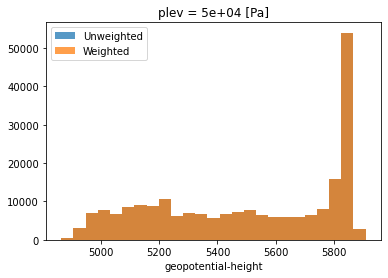

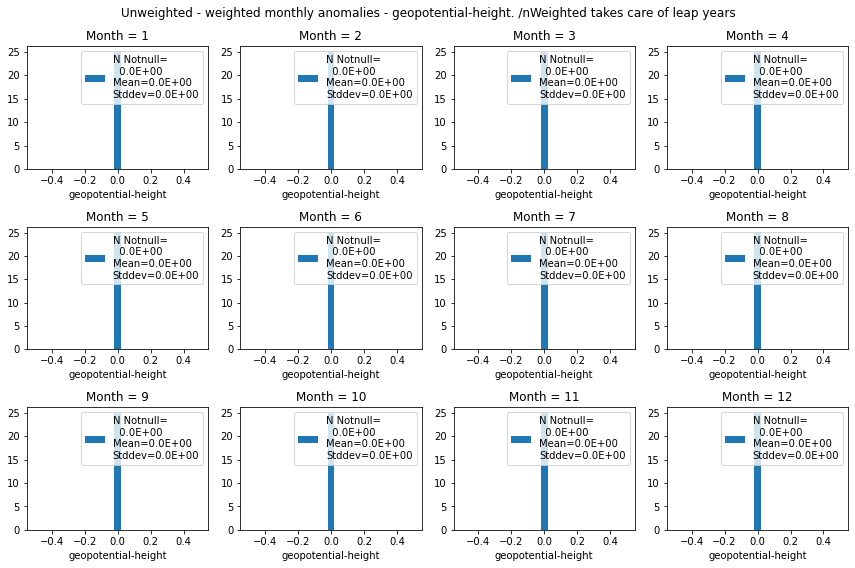

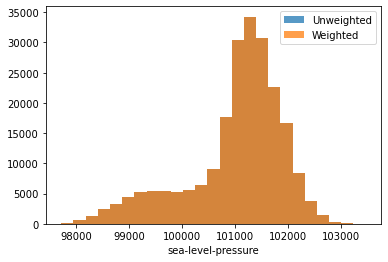

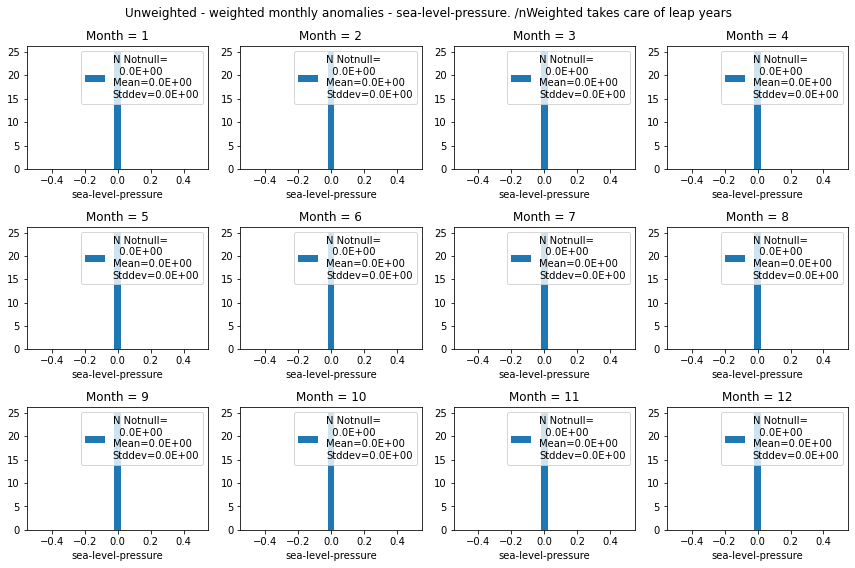

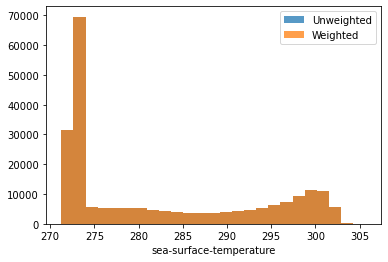

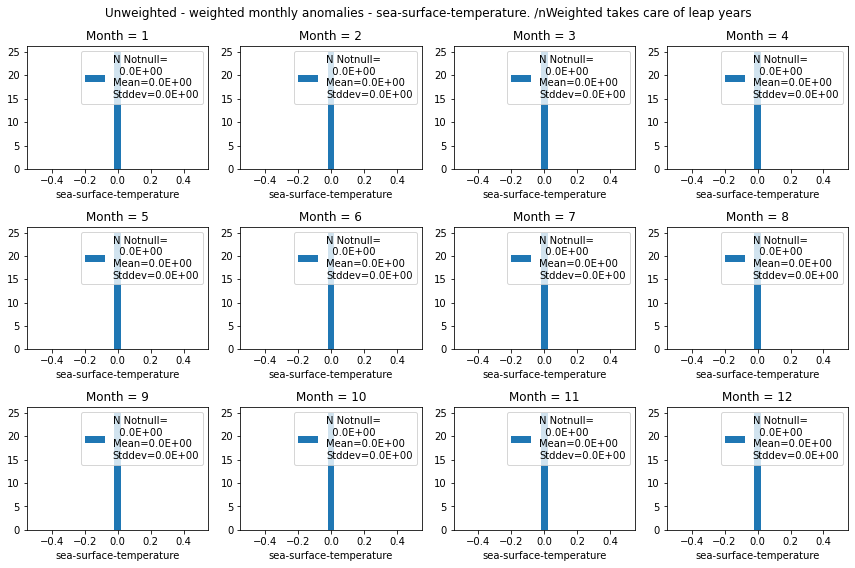

In [66]:
# plot the difference between weighted and unweighted seasonal differences
for varname in weighted_ma.keys() :
    plt.figure()
    plt.title(f'Monthly anomalies - {varname}. /nWeighted takes care of leap years')
    #dobj[varname].plot(
    #    label = "original")
    unweighted_ma[varname].plot(
        label = "Unweighted", 
        bins = 25,
        alpha = 0.75)
    weighted_ma[varname].plot(
        label = "Weighted",
        bins = 25,
        alpha = 0.75)
    plt.legend()
    fig2, axes = plt.subplots(nrows=3, ncols=4, figsize = (12,8))
    axes = axes.flatten()
    fig2.suptitle(f'Unweighted - weighted monthly anomalies - {varname}. /nWeighted takes care of leap years')
    
    for month, ax in zip(weighted_ma.month.values, axes) :
        diff = (unweighted_ma - weighted_ma)[varname].sel(month = month)
        diff_notnull = np.sum(diff != 0).values
        diff_mean = diff.mean().values
        diff_std = diff.std().values
        diff.plot.hist(ax = ax, 
                       bins = 25, 
                       density = True,
                       label = f'N Notnull=\n  {diff_notnull:.1E}\nMean={diff_mean:.1E}\nStddev={diff_std:.1E}')
        ax.set_title(f'Month = {month:.0f}' )
        ax.legend()
    fig2.tight_layout()